# Week_4_Natural_Language_Processing_with_Disaster_Tweets

For this week’s mini-project, you will participate in this 
Kaggle competition: Natural Language Processing with Disaster Tweets

This Kaggle competition is about classifying texts. It is an excellent introduction to Natural Language Processing (NLP). 

The project has 125 total points. The instructions summarize the criteria you will use to guide your submission and review others’ submissions. Note: to receive total points for this section, the learner doesn't need to have a top-performing score on the challenge. This is a mini-project to complete as a weekly assignment, so we don't expect you to iterate over your project until you have a model capable of winning the challenge. The learner needs to show a score that reasonably reflects that they completed the rubric parts of this project, E.g., a model score above 0.00000.  

You will submit three deliverables: 

#### Deliverable 1

A Jupyter notebook with a description of the problem/data, exploratory data analysis (EDA) procedure, analysis (model building and training), result, and discussion/conclusion. 

Suppose your work becomes so large that it doesn’t fit into one notebook (or you think it will be less readable by having one large notebook). In that case, you can make several notebooks or scripts in a GitHub repository (as deliverable 3) and submit a report-style notebook or pdf instead.

If your project doesn’t fit into Jupyter notebook format (E.g., you built an app that uses ML), write your approach as a report and submit it in a pdf form. 

#### Deliverable 2 

A public project GitHub repository with your work (please also include the GitHub repo URL in your notebook/report).

#### Deliverable 3

A screenshot of your position on the Kaggle competition leaderboard for your top-performing model.



### imports

In [40]:
import pandas as pd
import re
from pandas.core.frame import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import List, Dict
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from typing import Tuple
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from string import punctuation
import nltk
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem.porter import *
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [41]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [42]:
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

### load data

In [43]:
test = pd.read_csv('/Users/flaviab/Downloads/nlp-getting-started/test.csv')
train = pd.read_csv('/Users/flaviab/Downloads/nlp-getting-started/train.csv')
sample = pd.read_csv('/Users/flaviab/Downloads/nlp-getting-started/sample_submission.csv')

In [44]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [45]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Instructions: Step 1
- Brief description of the problem and data (5 pts)
- Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data. 

##### Brief problem description:
Predict whether a given tweet is about a real disaster or not. If a tweet is about a real disaster, it is labeled as 1, and if it's not, it's labeled as 0.

##### Data:
The data consists of tweets labeled by hand to determine their relevance to a disaster.

Columns:
    
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - the classification label: 1 means the tweet is about a real disaster, and 0 means it's not.

## Instructions: Step 2

- Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)
- Show a few visualizations like histograms. Describe any data cleaning procedures. 
- Based on your EDA, what is your plan of analysis? 
- Identify target column

EDA Plan:

0.  Load Datasets;
1.  EDA: check values distribuition and general info;
2.  EDA: identify target value;
3.  EDA: check missing values;
4.  EDA: Check duplicated lines;
5.  EDA: Plot data;
6:  EDA: Check if the target column is balancenced;
7.  Pre Processing: Fix missing values;
8.  Model: Perform feature importance to pick best columns; 
9.  Model: Process data using nlp to remove irrelevant words, signs, etc;
10. Model: Visualize text data as a word cloud;
11. Model: Perform tfidf to keep only the most relevant words;
12. Model: Perform pca to avoid dimensionality curse;
13. Analyze the frequency with which words are repeated in texts using count vectorizer;
10. Create a dataframe with the most relevant features;

In [ ]:
imitar numero de palavras usando tf-idf nela
ver nuvem de palavras
fazer label encoding
fazer count vectorizer
adicionar palavras mais relevantes ao dataset como colunas
fazer tsne, umap ou pca para reduzir dimensionalidade
fazer modelo de classificação

### EDA: - train and test dataset

EDA PLAN:

In [46]:
nan_list = [None, [], {}, 'NaN', 'Null','NULL','None', 'none', 'NA','<NA>','NaT','?','-', '.','', ' ', '   ']


In [47]:
def data_exploratory_analysis(train: pd.DataFrame, test: pd.DataFrame) -> None:
    
    for df_name, df in [("Train", train), ("Test", test)]:
        
        print(f"===== {df_name} Data Inspection =====")

        print(f"\nShape:\n{df.shape}")
        
        print(f"\nData Types:\n{df.dtypes}")
        
        print(f"\nMissing Values:\n{df.isnull().sum()}")
        
        print(f"\nUnique Values:\n{df.nunique()}")
        
        repeated_rows = df[df.duplicated()]
        print(f"\nNumber of Repeated Rows: {len(repeated_rows)}")
        
        columns_of_interest = ['keyword', 'location']
        for column in columns_of_interest:
            if column in df.columns:  
                print(f"\nDistinct values in column '{column}':")
                print(df[column].value_counts())

        print(f"\nHead:\n{df.head()}")
        
        print("\n" + "="*40 + "\n")


In [48]:
def check_missing_values(data: DataFrame) -> None:
    
    """
    This function looks for all types of missing values in dataframe column.
    """
    null_list = pd.DataFrame(nan_list)
    null_list

    for c in data.columns:
        string_null = np.array([x in nan_list[2:] for x in data[c]])
        print(c, data[c].isnull().sum(), string_null.sum())
        

def check_missing_values_in_dfs(dfs: List[DataFrame], names: List[str]) -> None:
    
    """
    This function checks for missing values in multiple dataframes.
    """
    
    for df, name in zip(dfs, names):
        print(f"Checking missing values in {name} dataframe:")
        check_missing_values(df)
        print("\n" + "="*40 + "\n")
        
        
def filter_by_nan_list(dataframes: dict, column: str) -> dict:
    """
    Filters each dataframe in the given dictionary by checking if values in the specified column 
    are in the predefined NaN list. Returns a dictionary of filtered dataframes.
    """
    
    filtered_dfs = {}
    
    for df_name, df in dataframes.items():
        filtered_dfs[df_name] = df[df[column].isin(nan_list)]
    
    return filtered_dfs

In [49]:
def plot_null_histograms(train: pd.DataFrame, test: pd.DataFrame):

    train_null = train.isnull().sum()
    test_null = test.isnull().sum()

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Train Null Values", "Test Null Values"))

    fig.add_trace(
        go.Bar(x=train_null.index, y=train_null.values, name='Train Null Values'),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=test_null.index, y=test_null.values, name='Test Null Values'),
        row=1, col=2
    )

    fig.update_layout(title_text="Histograms of Null Values in Train and Test Dataframes", barmode='group')
    fig.show()

In [50]:
def replace_and_plot_hist(dataframes: dict, columns: list) -> dict:
    
    """
    Replace NaN values with "unknown" and plot histograms for the given columns.
    """
    for df_name, df in dataframes.items():
        for col in columns:
            df[col] = df[col].fillna('unknown')
            df[col] = np.where(df[col].isin(nan_list), 'unknown', df[col])
            
            fig = px.histogram(df, x=col, title=f'{col} distribution in {df_name}')
            fig.show()
        

        dataframes[df_name] = df

    return dataframes



def calculate_missing_percent(dataframes: dict, columns: list) -> pd.DataFrame:
    
    """
    Calculate the percentage of missing values for the given columns across multiple dataframes.
    Returns a DataFrame with the results.
    """
    missing_data = {}
    
    for df_name, df in dataframes.items():
        missing_data[df_name] = {}
        
        for col in columns:
            missing_values = (df[col] == 'unknown').sum()
            print(missing_values)
            missing_data[df_name][col] = ((missing_values) / len(df)) * 100
    
    return pd.DataFrame(missing_data)

In [51]:
def plot_target_distribution(df, column_name):

    value_counts = df[column_name].value_counts()
    total_counts = len(df)
    percentages = (value_counts / total_counts * 100).round(2)

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        text=percentages.astype(str) + "%",
        textposition='auto'
    ))

    fig.update_layout(
        title_text=f'Distribution of {column_name} Column',
        xaxis_title="Class",
        yaxis_title="Count",
        bargap=0.2
    )

    fig.show()

    table_data = [['Class', 'Count', 'Percentage']]
    for idx, value in value_counts.items():
        table_data.append([idx, value, f"{percentages[idx]}%"])
    
    fig_table = ff.create_table(table_data)
    fig_table.show()

In [52]:
def get_feature_importance(train: pd.DataFrame, columns_list, target_column) -> pd.DataFrame:
    """
    Encode the specified columns using LabelEncoder, fit an ExtraTreesClassifier to the data
    and return the feature importance as a DataFrame.

    Parameters:
    - train: DataFrame containing the training data.
    
    Returns:
    - DataFrame: Feature importances sorted in descending order.
    """
    
    label_encoders = {}
    
    for column in columns_list:
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column])
        label_encoders[column] = le

    X = train[columns_list]
    y = train[target_column]

    clf = ExtraTreesClassifier()
    clf.fit(X, y)

    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': clf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    return feature_importances

In [53]:
def process_text(text):
    text = str(text)  # Convert text to string first
    text = text.lower()
    text = text.replace('-', ' ')

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [i for i in tokens if not i in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


def main(df, column_name):
    df['processed_text'] = df[column_name].apply(process_text)
    return df

def add_top_word_from_tfidf(df):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(df['processed_text'])
    feature_names = vectorizer.get_feature_names_out()
    
    df['top_tfidf_word'] = df['processed_text'].apply(lambda x: sorted([(tfidf, word) for word, tfidf in zip(feature_names, vectorizer.transform([x]).toarray()[0])], reverse=True)[0][1] if x else '')
    return df


In [54]:
def read_txt_to_list(filepath):
    with open(filepath, 'r') as file:
        return [line.strip() for line in file.readlines()]

def generate_unique_list(train, test, filepath):
    
    keyword_train_list = train.keyword.unique()
    keyword_test_list = test.keyword.unique()
    unique_combined_set = set(keyword_train_list).union(set(keyword_test_list))
    keywords_list = [word for word in unique_combined_set if word != 'unknown']

    lexicon_list = read_txt_to_list(filepath)
    
    final_list = list(set(keywords_list).union(set(lexicon_list)))

    return final_list


In [55]:
def add_disaster_keyword_column(df, column_name, disaster_keywords):
    
    def find_keyword(text):
        for keyword in disaster_keywords:
            if keyword in text:
                return keyword
        return 'unknown'

    df['disaster_keyword_found'] = df[column_name].apply(find_keyword)
    return df


In [56]:
data_exploratory_analysis(train, test)

===== Train Data Inspection =====

Shape:
(7613, 5)

Data Types:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Missing Values:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Unique Values:
id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

Number of Repeated Rows: 0

Distinct values in column 'keyword':
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Distinct values in column 'location':
USA                    104
New York                71
United States           50
London                  45
Canada                  29
        

In [57]:
check_missing_values_in_dfs([train, test], ["train", "test"])

Checking missing values in train dataframe:
id 0 0
keyword 61 0
location 2533 4
text 0 0
target 0 0


Checking missing values in test dataframe:
id 0 0
keyword 26 0
location 1105 1
text 0 0




In [58]:
plot_null_histograms(train, test)

Conclusão: ambos os datasets possuem bastante valores nulos, inclusive em outros formatos.
Não possui linhas repetidas.

##### check data balance in target column

In [59]:
plot_target_distribution(train, 'target')

The dataset is slightly unbalanced, but not too much to perform any high level transformation for now. In case the classification performs poorly, I'll perform a technique to fix it.

##### handle nans

In [60]:
dataframes = {"Train": train, "Test": test}
columns = ["keyword", "location"]

In [61]:
filtered_data = filter_by_nan_list(dataframes, 'location')

print(filtered_data["Train"])
print(filtered_data["Test"])

         id    keyword location  \
5399   7702  panicking        ?   
6540   9355   survived        ?   
6928   9937    trouble        ?   
7185  10295     weapon        ?   

                                                   text  target  
5399  I hear the mumbling i hear the cackling i got ...       0  
6540  @TheSmallClark 'He'll kill me instead if he su...       1  
6928     When there's trouble you know who to caaaaaall       0  
7185                                FUCK NUCLEAR WEAPON       0  
        id keyword location                                               text
2656  8876   smoke           I'm not asking no fee to smoke sumn if we ain'...


In [62]:
dataframes = replace_and_plot_hist(dataframes, columns)

In [63]:
missing_percent = calculate_missing_percent(dataframes, columns)
print(missing_percent)

61
2537
26
1106
              Train       Test
keyword    0.801261   0.796813
location  33.324576  33.895188


In [64]:
check_missing_values_in_dfs([train, test], ["train", "test"])

Checking missing values in train dataframe:
id 0 0
keyword 0 0
location 0 0
text 0 0
target 0 0


Checking missing values in test dataframe:
id 0 0
keyword 0 0
location 0 0
text 0 0




The column locations has over 33% of missing values in both datasets. Strategies: 

- feature importance technique to be sure the feature 'locations' can be dropped from the dataframe.
- replace the 'unknows' in the column keyword applying tf-idf in the missing data and attribute a key to that twitter.

In [29]:
feature_imp_df = get_feature_importance(train, ['id', 'keyword', 'location', 'text'], 'target')
print(feature_imp_df)

    Feature  Importance
0        id    0.301909
3      text    0.286120
1   keyword    0.235311
2  location    0.176660


- dropar coluna location 
- fazer tfidf para identificar palavra mais importante e substituir unknown em dataframe teste e train
- explorar dados de coluna text
- fazer nlp nela
- limitar numero de palavras usando tf-idf nela
- ver nuvem de palavras
- fazer label encoding
- fazer count vectorizer
- adicionar palavras mais relevantes ao dataset como colunas
- fazer tsne, umap ou pca para reduzir dimensionalidade
- fazer modelo de classificação

In [65]:
%%time

train = main(train, 'text')
test = main(test, 'text')

train = add_top_word_from_tfidf(train)
test = add_top_word_from_tfidf(test)

CPU times: user 1min 22s, sys: 1.78 s, total: 1min 24s
Wall time: 1min 28s


In [66]:
filepath = "/Users/flaviab/Downloads/CrisisLexLexicon/CrisisLexRec.txt"
disaster_keywords = generate_unique_list(train, test, filepath)

In [67]:
train = add_disaster_keyword_column(train, 'processed_text', disaster_keywords)
test = add_disaster_keyword_column(test, 'processed_text', disaster_keywords)

In [68]:
train[(train.keyword != 'unknown') & (train.disaster_keyword_found == 'unknown') & (train.target == 1) & (train.keyword == 'unknown')]

,id,keyword,location,text,target,processed_text,top_tfidf_word,disaster_keyword_found


In [69]:
test[(test.keyword != 'unknown') & (test.disaster_keyword_found == 'unknown') & (test.keyword == 'unknown')]

,id,keyword,location,text,processed_text,top_tfidf_word,disaster_keyword_found


In [70]:
train['keyword_updated'] = np.where(train.keyword == 'unknown', train.disaster_keyword_found, train.keyword)
test['keyword_updated'] = np.where(test.keyword == 'unknown', test.disaster_keyword_found, test.keyword)

In [71]:
le = LabelEncoder()

train['keyword_label'] = le.fit_transform(train['keyword_updated'])
test['keyword_label'] = le.fit_transform(test['keyword_updated'])

##### drop columns not to be used

In [72]:
test = test.drop(columns = ['keyword', 'location', 'text', 'top_tfidf_word','disaster_keyword_found'])
train = train.drop(columns = ['keyword', 'location', 'text', 'top_tfidf_word','disaster_keyword_found'])

## feature engineering

In [73]:
nltk_stopwords = nltk.corpus.stopwords.words('english')

In [74]:
def plot_wordcloud(data_text) -> None:
    
    """
    Generates a word cloud visualization based on a given input of text data.
    """

    all_words = [text for text in data_text]
    all_words = ' '.join([text for text in data_text])
    word_cloud = WordCloud().generate(all_words)

    cloud = WordCloud(stopwords=nltk_stopwords,
            background_color='black',
            max_words=100, max_font_size = 300, width = 3000, height = 1500).generate(all_words.lower())


    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

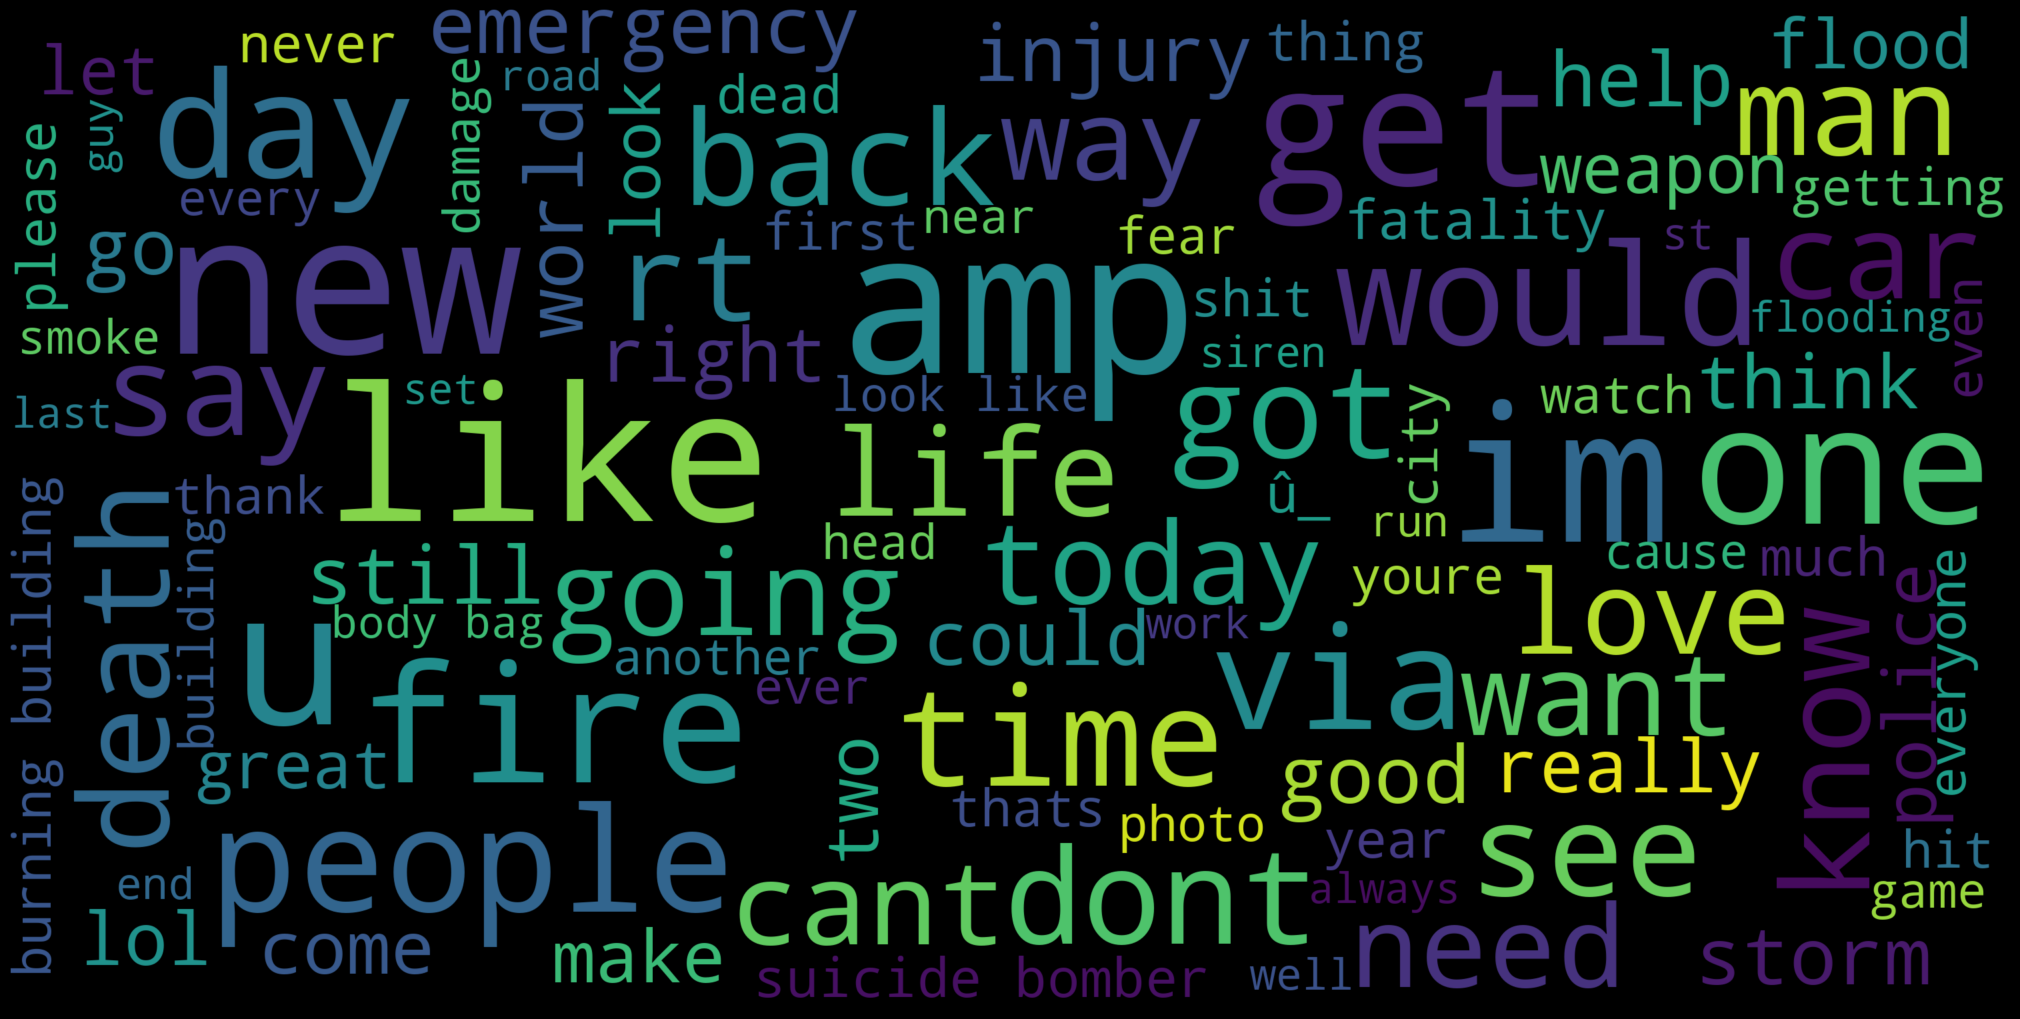

CPU times: user 5.74 s, sys: 1.24 s, total: 6.98 s
Wall time: 7.2 s


In [75]:
%%time 
plot_wordcloud(train.processed_text)

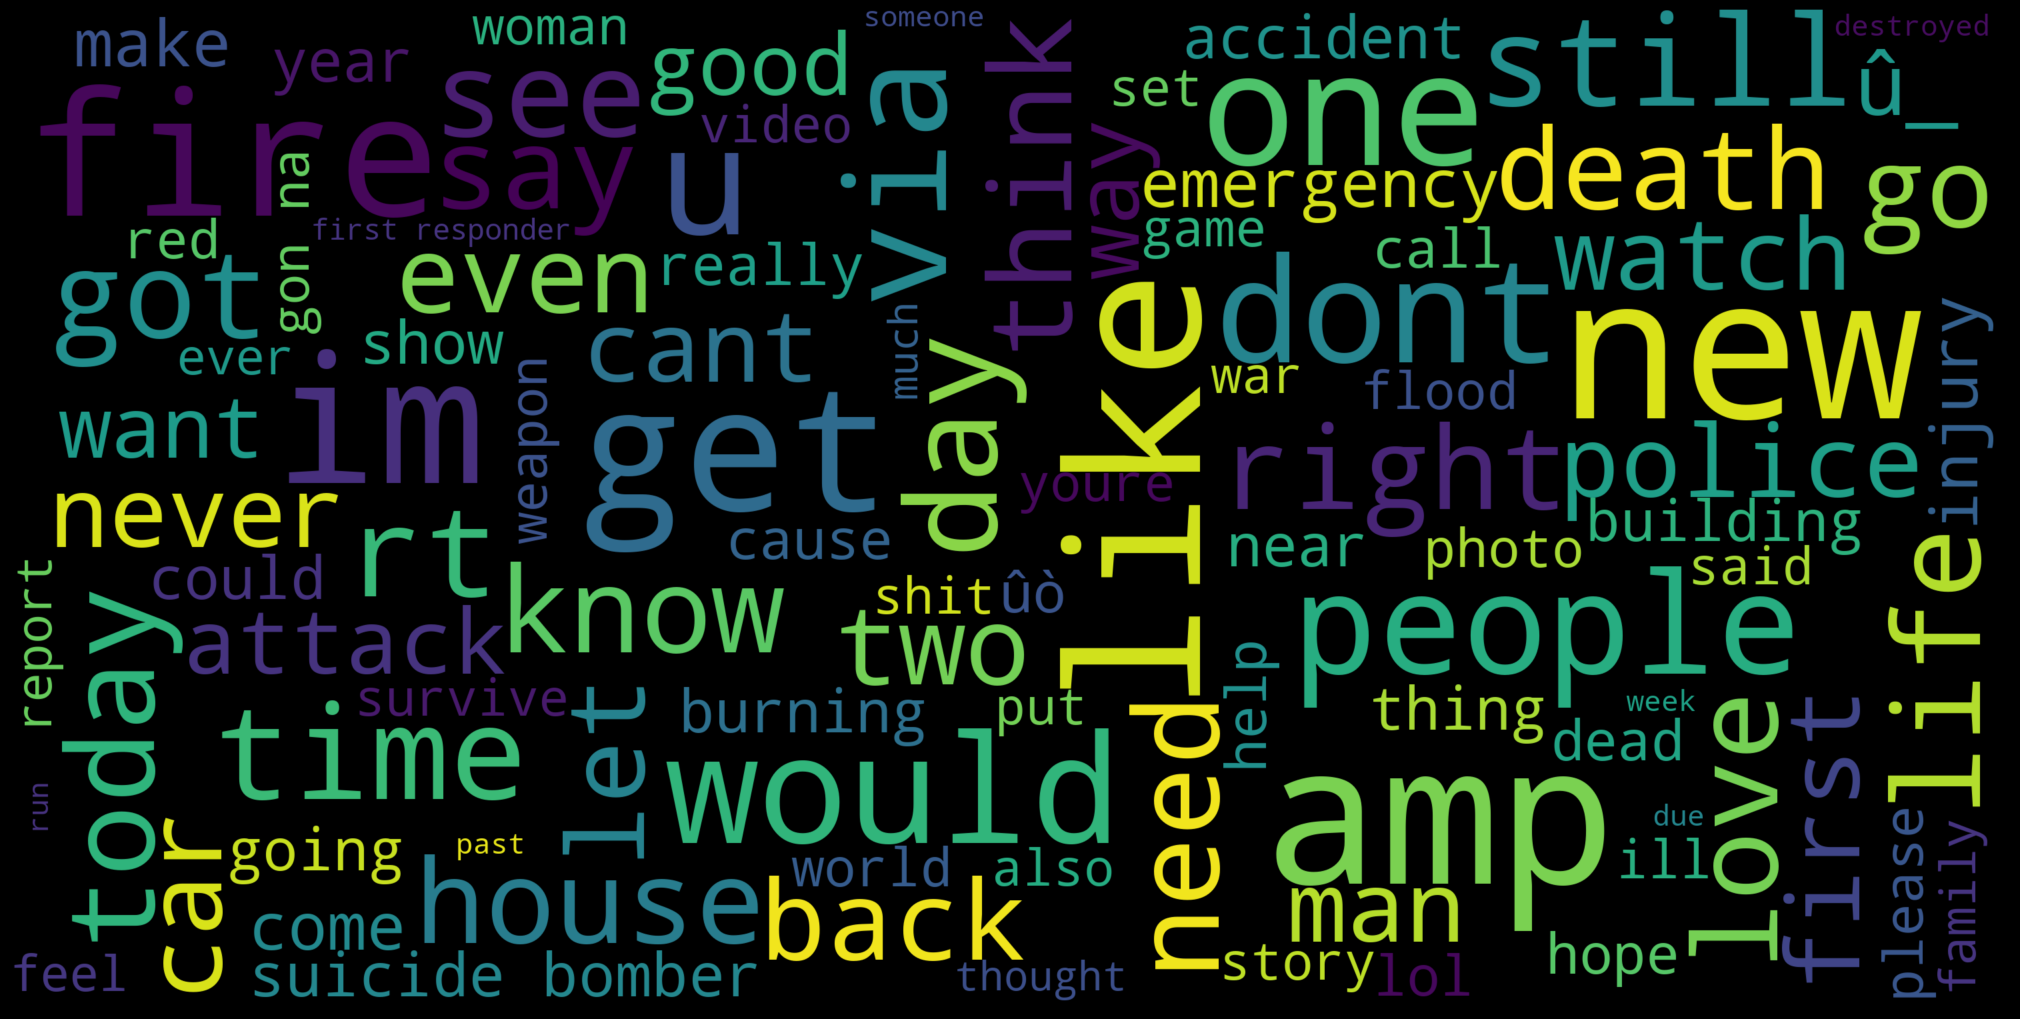

CPU times: user 5.82 s, sys: 1.42 s, total: 7.24 s
Wall time: 8.04 s


In [76]:
%%time 
plot_wordcloud(test.processed_text)

In [77]:
def count_vectorizer_word_frequency(nltk_stopwords: list, data_text: str) -> Tuple[List, List, List, List, List]:
    
    """
    This function performs term frequency analysis on a given text.
    """
    
    cv = CountVectorizer(stop_words=nltk_stopwords, analyzer="word")
    cv_matrix_term = cv.fit_transform(data_text)
    terms = cv.get_feature_names()
    term_sums = cv_matrix_term.sum(axis=0)
    term_counts = []
    out1 = []
    out2 = []
    terms_names = []
    
    for i in range(len(terms)):
        term_counts.append([terms[i], term_sums[0, i]])
    
    return terms, term_sums, term_counts, terms_names, out1, out2
    
        
def sortSecond(e) -> None:
    return e[1]
  

def count_all_terms(term_counts: list) -> None:
    
    """
    This function takes a list of term counts and returns its frequency.
    """
    
    term_counts.sort(key=sortSecond, reverse=True)
    print("\nMost frequent words in the text:")

    for i in range(400):
        
        print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
        out1.append([term_counts[i][0], term_counts[i][1]])
        
    np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
    print("")
    
def perform_tfidf(data_text: str) -> List[str]:
    
    """
    This function performs TF-IDF to find a numerical representation of the importance of a term in the text feature.
    """
    
    tfidf_vect = TfidfVectorizer()
    tfidf_matrix = tfidf_vect.fit_transform(data_text)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tfidf_matrix.sum(axis=0).A1
    term_idf_scores = sorted(zip(terms, term_idf_sums), key=lambda x: x[1], reverse=True)

    print("Frequency Matrix using TF-IDF")
    print("Frequency Matrix has:", tfidf_matrix.shape[0], "lines, and", tfidf_matrix.shape[1], "columns.")
    print("Terms list has:", len(terms), "terms.")
    print("\nTerms with high TF-IDF:")

    for term, score in term_idf_scores[:100]:
        print('{:<15s}{:>8.2f}'.format(term, score))
        out2.append([term, score])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')
        terms_names.append(term)

    return terms_names

In [78]:
def compilate_most_relevant_words(data_text: str, data: DataFrame, terms: list) -> DataFrame:
    
    """
    This function creates a dataframe compiling the most relevant words according to TF-IDF method
    and identifies if the word can be found in the text.
    """

    cv = CountVectorizer(stop_words=nltk_stopwords, analyzer="word")
    cv_matrix_term = cv.fit_transform(data_text)

    freq = pd.DataFrame(cv_matrix_term.toarray(), columns=terms)
    freq_sum = freq.sum()
    freq = freq.append(freq_sum, ignore_index=True)

    freq_t = freq.T.reset_index()
    freq_t.columns = ['term'] + list(range(len(freq_t.columns) - 1))
    freq_t = freq_t.sort_values(by='term').set_index('term').T

    data_words = freq_t[terms_names_tfidf]
    data_words[data_words != 0] = 1
    data_words = data_words[:-1]

    print(data.shape, data_words.shape)

    return data_words


In [79]:
def concatenate_dataframes(train: DataFrame, data_words:DataFrame) -> DataFrame:
    
    """
    This function compilates the dataframe with relevant words and original training dataset.
    """
    
    data_words= data_words.reset_index(drop=True)

    data_train_words = pd.concat([train, data_words], axis=1)
    
    return data_train_words

In [80]:
terms, term_sums, term_counts, terms_names, out1, out2  = count_vectorizer_word_frequency(nltk_stopwords, train.processed_text)
terms_test, term_sums_test, term_counts_test, terms_names_test, out1_test, out2_test  = count_vectorizer_word_frequency(nltk_stopwords, test.processed_text)

/Users/flaviab/opt/anaconda3/envs/nlp2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [81]:
count_all_terms(term_counts)


Most frequent words in the text:
fire             350
like             349
amp              300
im               299
get              255
new              224
via              220
one              206
people           199
news             198
dont             191
time             178
year             178
video            174
emergency        158
disaster         157
body             154
day              148
police           142
building         140
home             140
family           132
life             131
would            131
say              129
still            129
go               127
storm            126
crash            123
got              123
back             122
burning          121
california       121
bomb             120
know             120
look             120
suicide          120
world            116
car              115
flood            115
man              115
train            115
death            112
see              112
attack           108
first            108


In [82]:
terms_names_tfidf = perform_tfidf(train.processed_text)

Frequency Matrix using TF-IDF
Frequency Matrix has: 7613 lines, and 20162 columns.
Terms list has: 20162 terms.

Terms with high TF-IDF:
like              66.34
fire              65.64
im                65.38
get               52.94
amp               50.16
one               42.15
dont              42.09
new               41.55
via               41.50
people            40.65
news              38.54
time              37.75
year              36.10
video             35.10
disaster          34.55
body              33.22
day               33.06
home              32.06
emergency         31.76
building          31.33
still             30.34
family            30.34
go                29.60
got               29.40
would             29.22
life              29.13
storm             29.05
burning           28.99
california        28.81
look              28.08
police            27.91
crash             27.75
see               27.72
know              27.72
back              27.53
bomb              27.46

In [83]:
data_words = compilate_most_relevant_words(train.processed_text, train, terms)
train_words = concatenate_dataframes(train, data_words)

/var/folders/d6/ffbrvd_562v4n620sd03y7y80000gq/T/ipykernel_98265/2012554007.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(7613, 5) (7613, 100)


In [84]:
data_words_test = compilate_most_relevant_words(test.processed_text, test, terms_test)
test_words = concatenate_dataframes(test, data_words_test)

/var/folders/d6/ffbrvd_562v4n620sd03y7y80000gq/T/ipykernel_98265/2012554007.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(3263, 4) (3263, 100)


In [94]:
train_words = train_words.drop(columns= ['processed_text','keyword_updated'])
test_words = test_words.drop(columns= ['processed_text','keyword_updated'])

,id,target,keyword_label,like,fire,im,get,amp,one,dont,...,really,full,school,fear,best,thing,work,service,help,plan
0,1,1,87,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,107,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,107,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,1,46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,10870,1,107,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,10871,1,211,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,10872,1,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
train_words = train_words[['target'] + [col for col in train_words.columns if col != 'target']]


### pca/tsne/umap

In [100]:
def dimension_reduction(df, method='pca', threshold=0.00300, n_components=2):
    
    """
    Perform dimensionality reduction using PCA, t-SNE, or UMAP.
    """
    
    df_matrix = df.iloc[:, 1:].values
    scaler = StandardScaler().fit(df_matrix)
    df_matrix = scaler.transform(df_matrix)

    if method == 'pca':
        pca = PCA().fit(df_matrix)
        top_PCA = ["%.5f" % a for a in pca.explained_variance_ratio_ if a > threshold]

        sum_all = sum(pca.explained_variance_ratio_)
        pca_explain = PCA(n_components=len(top_PCA)).fit_transform(df_matrix)
        sum_explain = sum(pca_explain.explained_variance_ratio_)
        
        print(len(top_PCA))
        print(top_PCA)
        print("These variables explain the dataset by: ", round((sum_explain/sum_all)*100, 2), "%")
        
        return pca_explain

    elif method == 'tsne':
        tsne_result = TSNE(n_components=n_components).fit_transform(df_matrix)
        return tsne_result

    elif method == 'umap':
        umap_result = umap.UMAP(n_components=n_components).fit_transform(df_matrix)
        return umap_result

    else:
        print("Invalid method. Please choose 'pca', 'tsne', or 'umap'.")
        return None

    
    
def compare_dimension_reduction(df, n_components=2):
    
    """
    Perform and compare dimensionality reduction using PCA, t-SNE, and UMAP.
    """
    df_matrix = df.iloc[:, 1:].values
    scaler = StandardScaler().fit(df_matrix)
    df_matrix = scaler.transform(df_matrix)
    
    methods = ["PCA", "t-SNE", "UMAP"]
    results = []

    pca_result = PCA(n_components=n_components).fit_transform(df_matrix)
    results.append(pca_result)

    tsne_result = TSNE(n_components=n_components).fit_transform(df_matrix)
    results.append(tsne_result)

    umap_result = umap.UMAP(n_components=n_components).fit_transform(df_matrix)
    results.append(umap_result)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, method in enumerate(methods):
        if n_components == 2:
            axes[i].scatter(results[i][:, 0], results[i][:, 1], alpha=0.5)
            axes[i].set_title(method)
            axes[i].set_xlabel("Component 1")
            axes[i].set_ylabel("Component 2")
        elif n_components == 3:
            ax = fig.add_subplot(1, 3, i+1, projection='3d')
            ax.scatter(results[i][:, 0], results[i][:, 1], results[i][:, 2], alpha=0.5)
            ax.set_title(method)
            ax.set_xlabel("Component 1")
            ax.set_ylabel("Component 2")
            ax.set_zlabel("Component 3")

    plt.tight_layout()
    plt.show()


def perform_dimension_reduction(df, chosen_method='pca', n_components=2, threshold=0.00300):
    
    """
    Uses a chosen dimensionality reduction method after comparing PCA, t-SNE, and UMAP.
    The chosen method is then applied and the reduced data is returned.
    """
    
    df_matrix = df.iloc[:, 1:].values
    scaler = StandardScaler().fit(df_matrix)
    df_matrix = scaler.transform(df_matrix)
    
    chosen_method = chosen_method.lower()
    if chosen_method == "pca":
        pca = PCA().fit(df_matrix)
        top_PCA = [a for a in pca.explained_variance_ratio_ if a > threshold]
        result = PCA(n_components=len(top_PCA)).fit_transform(df_matrix)
    elif chosen_method == "tsne":
        result = TSNE(n_components=n_components).fit_transform(df_matrix)
    elif chosen_method == "umap":
        result = umap.UMAP(n_components=n_components).fit_transform(df_matrix)
    else:
        print("Invalid choice. Please select 'PCA', 't-SNE', or 'UMAP'.")
        return None

    return result



/Users/flaviab/opt/anaconda3/envs/nlp2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/flaviab/opt/anaconda3/envs/nlp2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


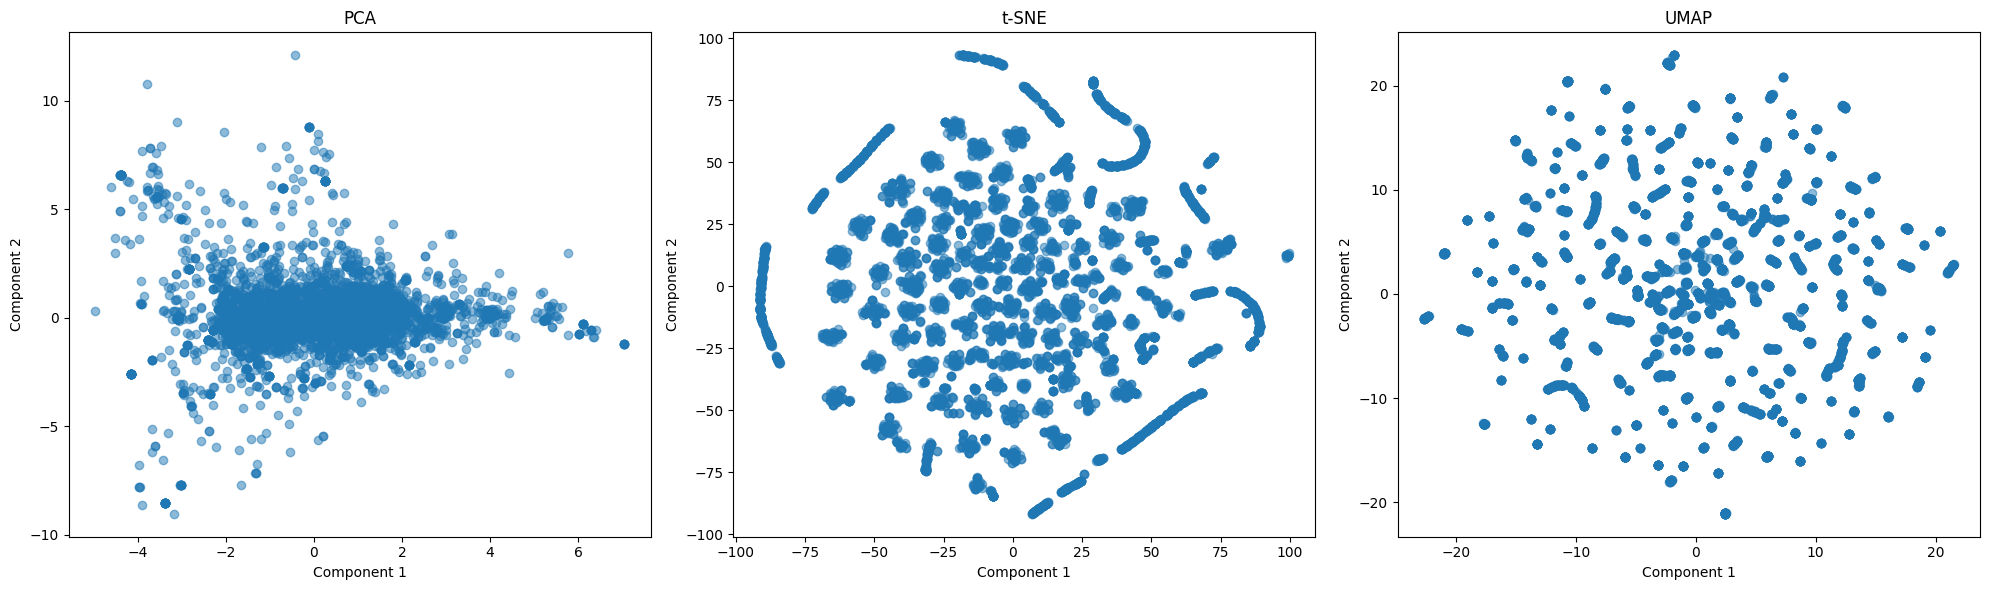

In [101]:
compare_dimension_reduction(train_words, n_components=2)

In [102]:
result_tsne = perform_dimension_reduction(train_words, chosen_method='tsne')
result_umap = perform_dimension_reduction(train_words, chosen_method='umap')
result_pca = perform_dimension_reduction(train_words, chosen_method='pca')

/Users/flaviab/opt/anaconda3/envs/nlp2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/flaviab/opt/anaconda3/envs/nlp2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [103]:
def extract_important_features(df, threshold=0.00300):
    
    """
    Extract important features using PCA and return top features based on the first principal component.
    """

    df_matrix = df.values
    scaler = StandardScaler().fit(df_matrix)
    df_matrix = scaler.transform(df_matrix)
    
    pca = PCA().fit(df_matrix)
    
    top_pca = ["%.5f" % a for a in pca.explained_variance_ratio_ if a > threshold]
    
    print(len(top_pca))
    print(top_pca)
    sumall = sum(pca.explained_variance_ratio_)
    
    pca_features = PCA(n_components=len(top_pca)).fit(df_matrix)
    sum_pca = sum(pca_features.explained_variance_ratio_)
    
    print("These variables explain the dataset by: ", round((sum_pca/sumall)*100, 2), "%")
    
    first_comp = pca_features.components_[0]
    first_comps = pd.DataFrame(list(zip(first_comp, df.columns)), columns=['weights', 'features'])
    first_comps['abs_weights'] = first_comps['weights'].apply(lambda x: np.abs(x))
    first_comps.sort_values('abs_weights', ascending=False, inplace=True)
    
    return first_comps




In [104]:
top_features = extract_important_features(train_words)
top_features

102
['0.02348', '0.01994', '0.01902', '0.01776', '0.01686', '0.01528', '0.01505', '0.01495', '0.01421', '0.01356', '0.01345', '0.01315', '0.01312', '0.01299', '0.01277', '0.01259', '0.01215', '0.01198', '0.01188', '0.01154', '0.01148', '0.01141', '0.01132', '0.01131', '0.01122', '0.01112', '0.01101', '0.01093', '0.01087', '0.01077', '0.01063', '0.01061', '0.01053', '0.01042', '0.01035', '0.01030', '0.01024', '0.01019', '0.01013', '0.01005', '0.00992', '0.00990', '0.00988', '0.00984', '0.00983', '0.00974', '0.00962', '0.00959', '0.00953', '0.00952', '0.00948', '0.00942', '0.00937', '0.00929', '0.00918', '0.00913', '0.00910', '0.00905', '0.00904', '0.00892', '0.00885', '0.00878', '0.00872', '0.00869', '0.00864', '0.00857', '0.00853', '0.00847', '0.00844', '0.00840', '0.00835', '0.00829', '0.00817', '0.00812', '0.00812', '0.00804', '0.00798', '0.00789', '0.00777', '0.00773', '0.00759', '0.00755', '0.00747', '0.00735', '0.00729', '0.00709', '0.00706', '0.00694', '0.00681', '0.00672', '0.00

,weights,features,abs_weights
1,-0.531598,id,0.531598
2,-0.529970,keyword_label,0.529970
84,0.243054,bag,0.243054
18,0.230432,body,0.230432
42,-0.202254,suicide,0.202254
...,...,...,...
46,-0.000728,train,0.000728
12,-0.000725,people,0.000725
101,0.000513,help,0.000513
96,0.000446,fear,0.000446


In [105]:
feature_imp_words = get_feature_importance(train_words, train_words.iloc[:, 1:].columns, 'target')
feature_imp_words

,Feature,Importance
0,id,0.373892
1,keyword_label,0.136040
3,fire,0.017070
58,hiroshima,0.012142
45,train,0.011783
...,...,...
81,old,0.002339
99,service,0.002248
86,lol,0.002158
29,burning,0.002062


In [110]:
def retain_top_features(df, feature_imp_word):
    
    """
    Retains only the top features in the dataframe based on the feature_imp_word results.
    """
    
    top_features = feature_imp_word['Feature'].head(80).tolist()
    
    columns_to_retain = ['target'] + [col for col in top_features if col in df.columns]

    df_top_features = df[columns_to_retain]
    
    return df_top_features

train_reduced = retain_top_features(train_words, feature_imp_words)



### Classification

In [112]:
def evaluate_and_train_best_model(train_reduced, target_column, num_folds):

    validation_size = 3263
    
    X = train_reduced.drop(target_column, axis=1)
    y = train_reduced[target_column]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_size, random_state=42)
    
    models = []
    results = []
    names = []

    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('XGB', XGBClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('CAT', CatBoostClassifier(logging_level='Silent')))

    for name, model in models:
        kfold = KFold(num_folds, shuffle=True)
        crossvalidation_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(crossvalidation_result)
        names.append(name)
        msg = "%s: %f %f %f (%f)" % (name, crossvalidation_result.mean(), crossvalidation_result.max(), crossvalidation_result.min(), crossvalidation_result.std())
        print(msg)

    plot_accuracies = plt.figure(figsize=(8, 10))
    plot_accuracies.suptitle('Compare classification algorithms')
    ax = plot_accuracies.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    mean_scores = [r.mean() for r in results]
    best_model_index = mean_scores.index(max(mean_scores))
    best_model_name = names[best_model_index]
    best_model = [model for name, model in models if name == best_model_name][0]
    best_model.fit(X_train, y_train)
    

    validation_accuracy = best_model.score(X_val, y_val)
    print(f'Validation accuracy of best model ({best_model_name}): {validation_accuracy:.4f}')
    
    return best_model


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
NB: 0.704137 0.788991 0.623853 (0.041066)
KNN: 0.703891 0.807339 0.614679 (0.043708)
LR: 0.708036 0.788991 0.623853 (0.040969)
LDA: 0.710550 0.788991 0.605505 (0.039667)
CART: 0.688961 0.761468 0.559633 (0.039282)
XGB: 0.742782 0.805556 0.669725 (0.036243)
RF: 0.711035 0.770642 0.559633 (0.039185)
CAT: 0.740959 0.807339 0.642202 (0.042769)


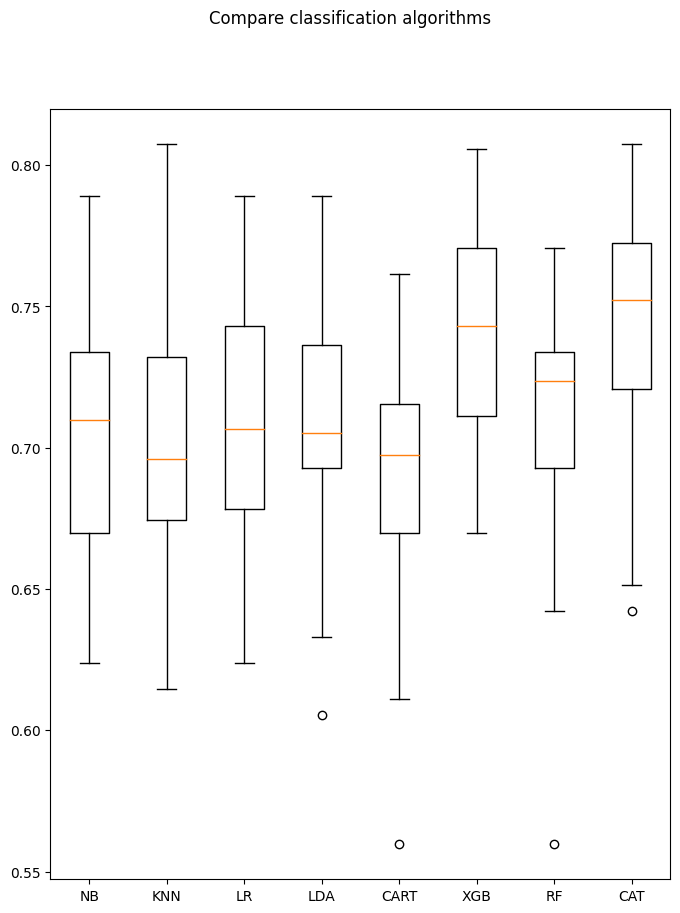

Validation accuracy of best model (XGB): 0.7462


In [113]:
%time

warnings.filterwarnings("ignore")
best_model = evaluate_and_train_best_model(train_reduced, 'target', 40)

## Instructions: Step 3

- Model Architecture (25 pts)
- Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. 
- Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.). 


#### Model's architecture description:

LSTM Model:
- Embedding Layer: First layer in the model that transforms integer sequences to dense vectors of fixed size.
The vocab_size is the number of unique tokens plus one.
- LSTM Layer: Type of Recurrent Neural Network (RNN) which is good at handling sequential data, like text. LSTM can remember patterns over time and over sequences. 
The layer has dropout to prevent overfitting.
- Dense Layer: This is the output layer with a sigmoid activation function since this is a binary classification problem (tweet is about a disaster or not).
Hyperparameter Optimization:



- Bayesian Optimization is used to find the best hyperparameters for the model. The hyperparameters being optimized are:
lr: Learning rate for the Adam optimizer.
- batch_size: Number of samples processed before the model is updated.
- neurons: Number of LSTM units.
- The function black_box_function is defined as the function to maximize (since Bayesian optimization seeks to maximize a function). It:
- EarlyStopping: To prevent overfitting, training can be stopped early if the validation accuracy doesn't improve for a number of epochs (patience=3).
- ReduceLROnPlateau: If the validation accuracy doesn't improve for a set number of epochs (patience=2), the learning rate is reduced by a factor of 0.2.


#### Reasoning for this architecture
Tweets are sequential data, where the order and context of words matter. LSTM networks, being a type of RNN, are adept at handling such data.

- Embedding Layer: This layer can capture semantic relationships between words and represents them as vectors in a high-dimensional space.

- Hyperparameter Optimization: Neural networks have several hyperparameters that can drastically affect performance. Using Bayesian Optimization can systematically find a set of hyperparameters that yield good performance on the validation set.
- Dropouts: Helps in regularizing the model and preventing overfitting.


### RNN TEST

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from bayes_opt import BayesianOptimization

In [116]:
train_data = train['processed_text'].values
train_target = train['target'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
vocab_size = len(tokenizer.word_index) + 1

X = tokenizer.texts_to_sequences(train_data)
X = pad_sequences(X) 
y = train_target

validation_size = 3263
X_train, X_val = X[:-validation_size], X[-validation_size:]
y_train, y_val = y[:-validation_size], y[-validation_size:]


In [118]:
def create_lstm_model(input_length, neurons=64
                      
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=128, input_length=input_length))
    model.add(LSTM(neurons, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

                      
def black_box_function(lr, batch_size, neurons):
    model = create_lstm_model(input_length=X_train.shape[1], neurons=int(neurons))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=0.001)

    model.fit(X_train, y_train, 
              validation_data=(X_val, y_val), 
              epochs=5, 
              batch_size=int(batch_size), 
              callbacks=[early_stopping, reduce_lr], 
              verbose=0)
    
    current_val_accuracy = model.history.history['val_accuracy'][-1]
    
    global best_val_accuracy
    global best_model
    if current_val_accuracy > best_val_accuracy:
        best_val_accuracy = current_val_accuracy
        best_model = model  # Save the current model as the best model
    
    return current_val_accuracy

## Instructions: Step 4

- Results and Analysis (35 pts)
- Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.
- Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

In [124]:
%%time

global best_val_accuracy
best_val_accuracy = 0  # Initialized to the lowest possible value for accuracy.

global best_model
best_model = None

bounds = {
    'lr': (0.0001, 0.01), 
    'batch_size': (32, 256), 
    'neurons': (40, 120)
}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=bounds,
    verbose=2,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | batch_... |    lr     |  neurons  |
-------------------------------------------------------------
| 1         | 0.7104    | 115.9     | 0.009512  | 98.56     |
| 2         | 0.7147    | 166.1     | 0.001645  | 52.48     |
| 3         | 0.7076    | 45.01     | 0.008675  | 88.09     |
| 4         | 0.7456    | 190.6     | 0.0003038 | 117.6     |
| 5         | 0.7208    | 218.5     | 0.002202  | 54.55     |
| 6         | 0.7119    | 190.9     | 0.005242  | 118.4     |
| 7         | 0.7113    | 68.02     | 0.004051  | 46.92     |
| 8         | 0.7076    | 104.9     | 0.004843  | 51.42     |
| 9         | 0.7159    | 243.2     | 0.003742  | 57.7      |
| 10        | 0.7067    | 232.3     | 0.008629  | 73.06     |
| 11        | 0.7263    | 106.4     | 0.006831  | 117.0     |
| 12        | 0.7073    | 53.15     | 0.008033  | 87.66     |
| 13        | 0.7202    | 122.3     | 0.008423  | 100.6     |
| 14        | 0.7168    | 168.7     | 0.002292  | 118.1     |
| 15    

In [128]:
def plot_train_val_accuracy(model):
    plt.figure(figsize=(12, 6))
    plt.plot(model.history.history['accuracy'], label='Train Accuracy')
    plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def evaluate_model(model, X_val, y_val):

    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    
    print("\nClassification Report:\n", classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    
    if len(set(y_val)) == 2:
        fpr, tpr, thresholds = roc_curve(y_val, model.predict(X_val))
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc='lower right')
        plt.show()




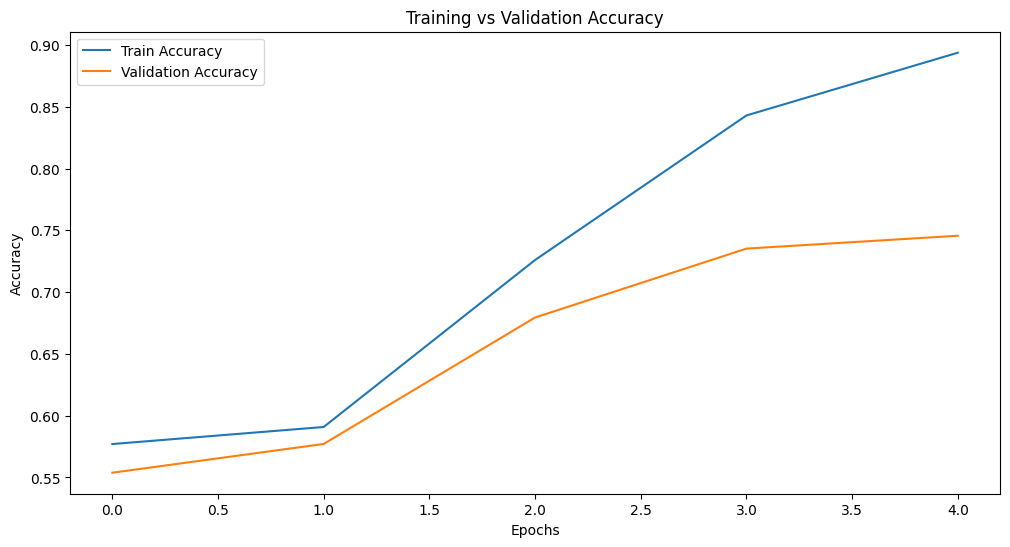

In [129]:
plot_train_val_accuracy(best_model)


102/102 [==============================] - 1s 6ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1807
           1       0.79      0.59      0.67      1456

    accuracy                           0.75      3263
   macro avg       0.76      0.73      0.73      3263
weighted avg       0.75      0.75      0.74      3263



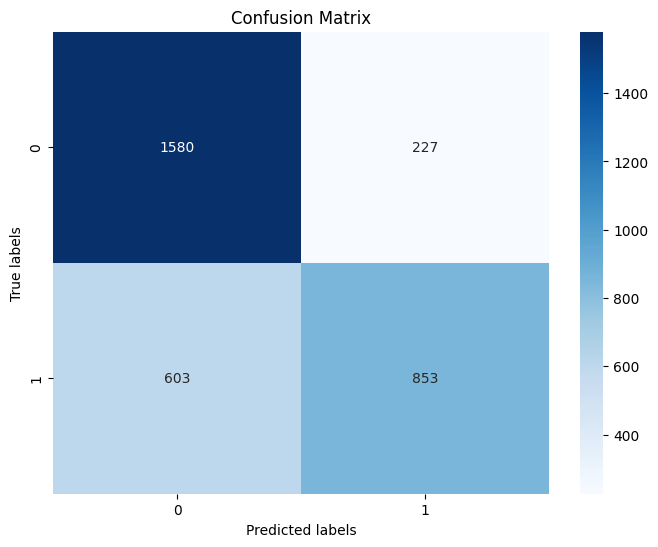

102/102 [==============================] - 1s 6ms/step


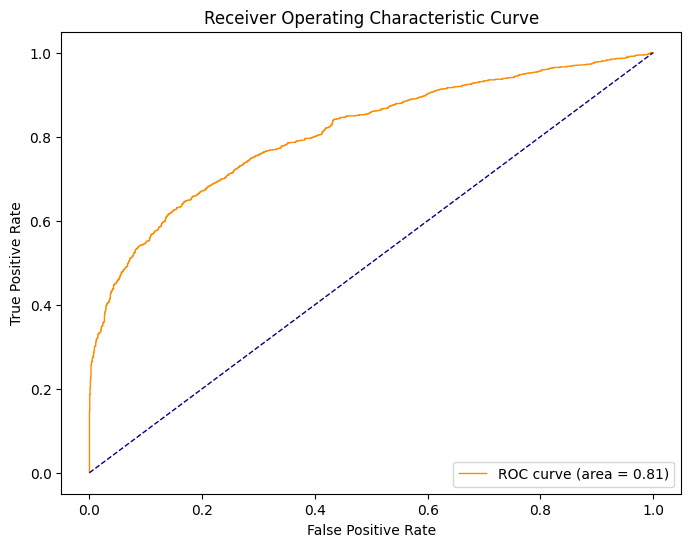

In [130]:
evaluate_model(best_model, X_val, y_val)

## Instructions: Step 5
- Conclusion (15 pts)
- Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?



#### Conclusion: 
According to the recall metric, the model can predict 87% of times when a tweet is not about a disaster, but still has some trouble to understand when it is.
The results of the LSTM model are similar to the regular classification performed earlier as the baseline.  Still, the results could be improved with another strategies such as:

- Increase the dropout rates in the LSTM and Dense layers;
- Expanding the hyper parameter search;
- Use pre-trained embeddings models instead of building one from the scratch;
